In [1]:
from typing import Literal

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Draw import MolDrawing, DrawingOptions

In [2]:
def show_atom_number(
    mol, label: Literal["atomLabel", "molAtomMapNumber", "atomNote"] = "atomNote"
):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx() + 1))
    return mol

In [3]:
DrawingOptions.bondLineWidth = 1.8
DrawingOptions.atomLabelFontSize = 14
# DrawingOptions.includeAtomNumbers=True
# for drawing options
# https://github.com/rdkit/rdkit/issues/2496
# https://stackoverflow.com/questions/53321453/rdkit-how-to-show-moleculars-atoms-number

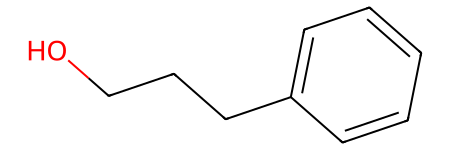

In [4]:
start_mol = Chem.MolFromSmiles("c1cc(CCCO)ccc1")
start_mol

### delete atoms


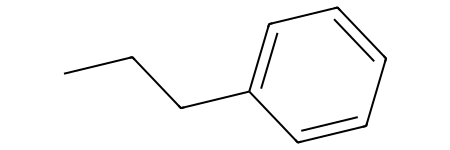

In [5]:
truncate = Chem.DeleteSubstructs(start_mol, Chem.MolFromSmiles("O"))
truncate

### combine fragments


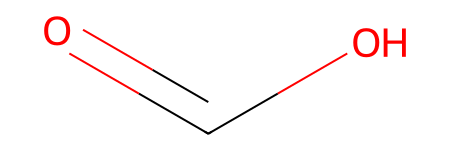

In [6]:
mod = Chem.MolFromSmiles("OC=O")
mod

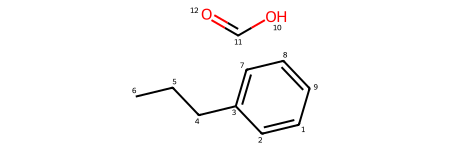

In [7]:
combo = Chem.CombineMols(truncate, mod)
edcombo = Chem.EditableMol(combo)
show_atom_number(combo)

In [8]:
edcombo.AddBond(5, 10, order=Chem.rdchem.BondType.SINGLE)

12

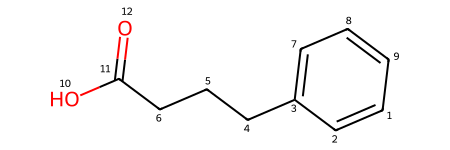

In [9]:
show_atom_number(edcombo.GetMol())

### replacing substructure


In [10]:
# DrawingOptions.includeAtomNumbers=False

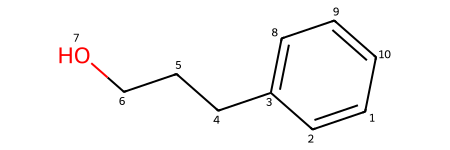

In [11]:
show_atom_number(start_mol)

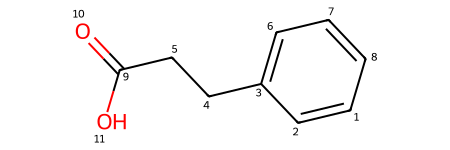

Bad pipe message: %s [b'svg+xml,image/*,*/*;q=0.8\r\nHost: localhost:38353\r\nUser-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X', b'0_15_7) AppleWebKit/537.36 (KHT', b', like Gecko) Chrome/124.0.0.0 Safari/537.36\r\nAccept-Encoding: gzip, deflate']
Bad pipe message: %s [b'br, zstd\r\nAccept-Language: en-US,en;q=0.9,z']
Bad pipe message: %s [b'CA;q=0.8,zh;q=0.7,zh-CN;q=0.6\r\nReferer: https://k6v5qn65-38353.use.devtunnels.ms/\r\nX-Request-ID: eb9a3f', b'cb2a1473b6431cf11ac8ff00\r\nX-Real-IP: 10.240.3.217\r\nX-Forwarded-Port: 443\r\nX-Forwarded-Scheme: https\r', b'-Original']
Bad pipe message: %s [b'RI: /favicon.ico\r\nX-Scheme: https\r\nsec-ch-ua', b'"Chromium";v="124", "Google Chrome";v="124", "Not-A.Brand']
Bad pipe message: %s [b'v="99"\r\nsec-ch-ua-mobile: ?0\r\nsec', b'h-ua-platform: "macOS"\r\nsec-fetch-site: same', b'rigin\r\nsec-fetch-mode: no-cors\r\nsec-fetch-de', b': image\r\npriority: u=1, i\r\nX-Original-Proto: https\r\nCookie: ajs_anonymous_id=ea66b912-62fa-4684-98e6-e089

In [12]:
mod_mol = Chem.ReplaceSubstructs(
    start_mol, Chem.MolFromSmiles("CO"), Chem.MolFromSmiles("C(=O)O"), replaceAll=True
)
show_atom_number(mod_mol[0])

# Generate possible molecules from a dataset

The code is modified from https://iwatobipen.wordpress.com/2019/01/18/generate-possible-molecules-from-a-dataset-chemoinformatics-rdkit/

See the other file, `enum_mols.ipynb`
